In [1]:
#READING OF DATA
import pandas as pd
import numpy as np
import re
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kde

%matplotlib inline

In [2]:
# Let's read the data file
df = pd.read_csv('data.csv')

In [3]:
# Let's check the shape of the dataframe
df.shape

(18207, 89)

In [4]:
# Let's take a look into the columns
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
# Let's take a look of the dataframe
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# Let's take a look of some descriptive statistics
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
#DATA PREPARATION

In [8]:
# Let's define which of the columns are useless for a general analysis using simple logic
useless_columns = [
    'Unnamed: 0', # it's just the csv index
    'ID', # the ID of the player doesn't tell us anything
    'Photo', # The way a player play or how much he earn should be based on his appearance
    'Flag', # The flag is just the graphical representation of the country
    'Jersey Number', # The number of the jersey many times does not represents anything
    'Club Logo', # It's just the graphical representation of the club
    'Special', # Don't know what does this number represent
    'Real Face', # The way a player play or how much he earn should be based on his appearance
    'Body Type' # The body type is just the way that is representated in the FIFA (but there are justy 2 types)
]

In [9]:
# Dropping the useless columns for this analysis
df = df.drop(columns=useless_columns, axis=0)

In [10]:
# Finding emtpy columns
empty_columns = []
for col in df.columns:
    empty_rate = np.sum(df[col].isnull())/df.shape[0]
    if empty_rate > .5:
        print(col, empty_rate)
        empty_columns.append(col)


Loaned From 0.9305761520294392


In [11]:
# The 93% of the column Loaned From is empty, so we are going to drop it since we cannot obtain any valuable data from it.
df = df.drop(columns=empty_columns, axis=0)

In [12]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [13]:
#BEST PLAYERS

In [14]:
# TOP 5 Players
df.sort_values(['Overall'], ascending=False).iloc[0:5]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,5.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,4.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [15]:
df[['Name', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']]

,Name,LS,ST,RS,LW,LF,CF,RF,RW,LAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,Cristiano Ronaldo,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,De Gea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K. De Bruyne,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,...,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
18203,N. Christoffersson,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,...,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
18204,B. Worman,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,...,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2
18205,D. Walker-Rice,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,45+2,...,36+2,32+2,32+2,32+2,36+2,35+2,31+2,31+2,31+2,35+2


In [16]:
#WORST PLAYER

In [17]:
# Finding the worst player
df.sort_values(['Overall'])[['Name', 'Overall']].iloc[1]

Name       Zhang Yufeng
Overall              47
Name: 18186, dtype: object

In [18]:
#PRICING FIELDS

In [19]:
pricing_columns = ['Value', 'Wage', 'Release Clause']
pricing_chars = set()
for index, row in df[pricing_columns].iterrows():
    for col in pricing_columns:
        if isinstance(row[col], str):
            pricing_chars |= set(re.findall(r'\D\D*', row[col]))
print("Chars used in pricing fields:", pricing_chars)

Chars used in pricing fields: {'€', '.', 'K', 'M'}


In [20]:
# Let's define a function to parse the pricing values str to float
def price_to_float(price_str):
    if not pd.isnull(price_str):
        char_value = {
            'M': 1000000,
            'K': 1000
        }
        price = price_str.replace('€', '')
        char_found_search = re.search(r'K|M', price)
        if char_found_search:
            char_found = char_found_search.group(0)
            return float(price.replace(char_found, '')) * char_value.get(char_found)
        return price
    else:
        return price_str

In [21]:
for col in pricing_columns:
    df[col] = df[col].apply(price_to_float)

In [22]:
#CLASSIFICATION

In [23]:
df['Preferred Foot'] = df['Preferred Foot'].map({'Left': 0, 'Right': 1})

In [24]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Position', 'Joined',
       'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [25]:
#PARSING STRING TO FLOAT

In [26]:
df['Height'] = [float(h.replace("'", ".")) if isinstance(h, str) else h for h in  df['Height']]

In [27]:
df['Weight'] = [float(w.replace("lbs", "")) if isinstance(w, str) else w for w in  df['Weight']]

In [29]:
position_columns = ['LS', 'ST', 'RS', 'LW',
       'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
       'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']    
for col in position_columns:
    df[col] = df[col].map(lambda x: eval(x) if not pd.isnull(x) else x)

In [30]:
forward_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
middle_columns = ['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM']
defender_columns = ['RWB', 'LWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
def get_postions_stats(df):
    columns_list = []
    for index, row in df.iterrows():
        columns = {}
        if pd.isnull(row['LS']):
            columns = {
                'avg_forward': 0, 
                'max_forward': 0, 
                'min_forward': 0,
                'avg_middle': 0,
                'max_middle': 0,
                'min_middle': 0,
                'avg_defender': 0,
                'max_defender': 0,
                'min_defender': 0,
                'Position_': 'goalkeeper'
            }
        else:
            columns['avg_forward'] = row[forward_columns].mean()
            columns['max_forward'] = row[forward_columns].max()
            columns['min_forward'] = row[forward_columns].min()
            columns['avg_middle'] = row[middle_columns].mean()
            columns['max_middle'] = row[middle_columns].max()
            columns['min_middle'] = row[middle_columns].min()
            columns['avg_defender'] = row[defender_columns].mean()
            columns['max_defender'] = row[defender_columns].max()
            columns['min_defender'] = row[defender_columns].min()
            
            max_grade = columns['avg_defender']
            position = 'defender' # Most common position
            if columns['avg_middle'] > max_grade:
                max_grade = columns['avg_middle']
                position = 'middle'
            if columns['avg_forward'] > max_grade:
                position = 'forward'
            columns['Position_'] = position
        columns_list.append(columns)
    return pd.concat([df, pd.DataFrame(columns_list)], axis=1)

In [31]:
df = get_postions_stats(df)

In [32]:
df[['Name', 'Position_']]

,Name,Position_
0,L. Messi,forward
1,Cristiano Ronaldo,forward
2,Neymar Jr,forward
3,De Gea,goalkeeper
4,K. De Bruyne,forward
...,...,...
18202,J. Lundstram,middle
18203,N. Christoffersson,forward
18204,B. Worman,forward
18205,D. Walker-Rice,forward


In [33]:
best_players = df[df.Overall > 80]
print("{} Best players".format(best_players.shape[0]))

412 Best players


In [34]:
avg_players = df[(df.Overall > 65) & (df.Overall < 80)]
print("{} avg players".format(avg_players.shape[0]))

9372 avg players


In [35]:
poor_players = df[df.Overall < 65]
print("{} poor players".format(poor_players.shape[0]))

7235 poor players


In [36]:
#RELATION ATTRIBUTES - POSITIONING

In [37]:
attrs = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']

def show_attributes(df):
    """
    This function receives a dataframe, groups the data by position and obtains the mean of the attributes.
    Then displays the values in a heat map.
    
    Parameters:
    df (pd.DataFrame): Dataframe of the users.

    Returns:
    None
    """
    data = df[attrs + ['Position_']].groupby('Position_').mean()
    sns.set(font_scale=2)
    plt.figure(figsize=(30,10))
    sns.heatmap(data, annot=True, cbar=False, cmap="Blues")

In [38]:
#BEST PLAYERS

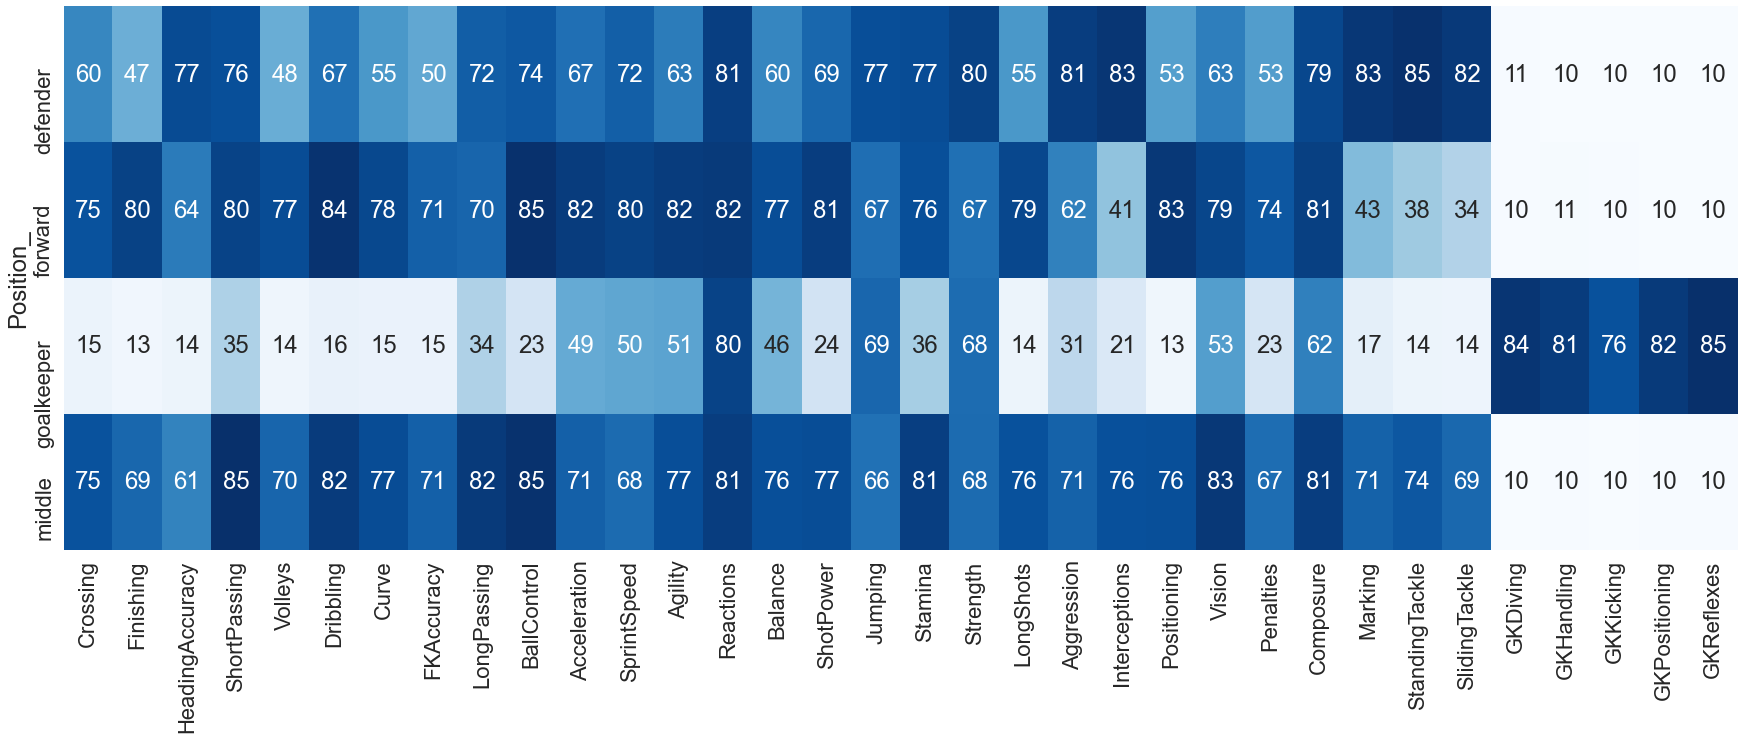

In [39]:
# Mean values of the attributes for each positions. (BEST PLAYERS)
show_attributes(best_players)

In [40]:
#AVERAGE PLAYERS

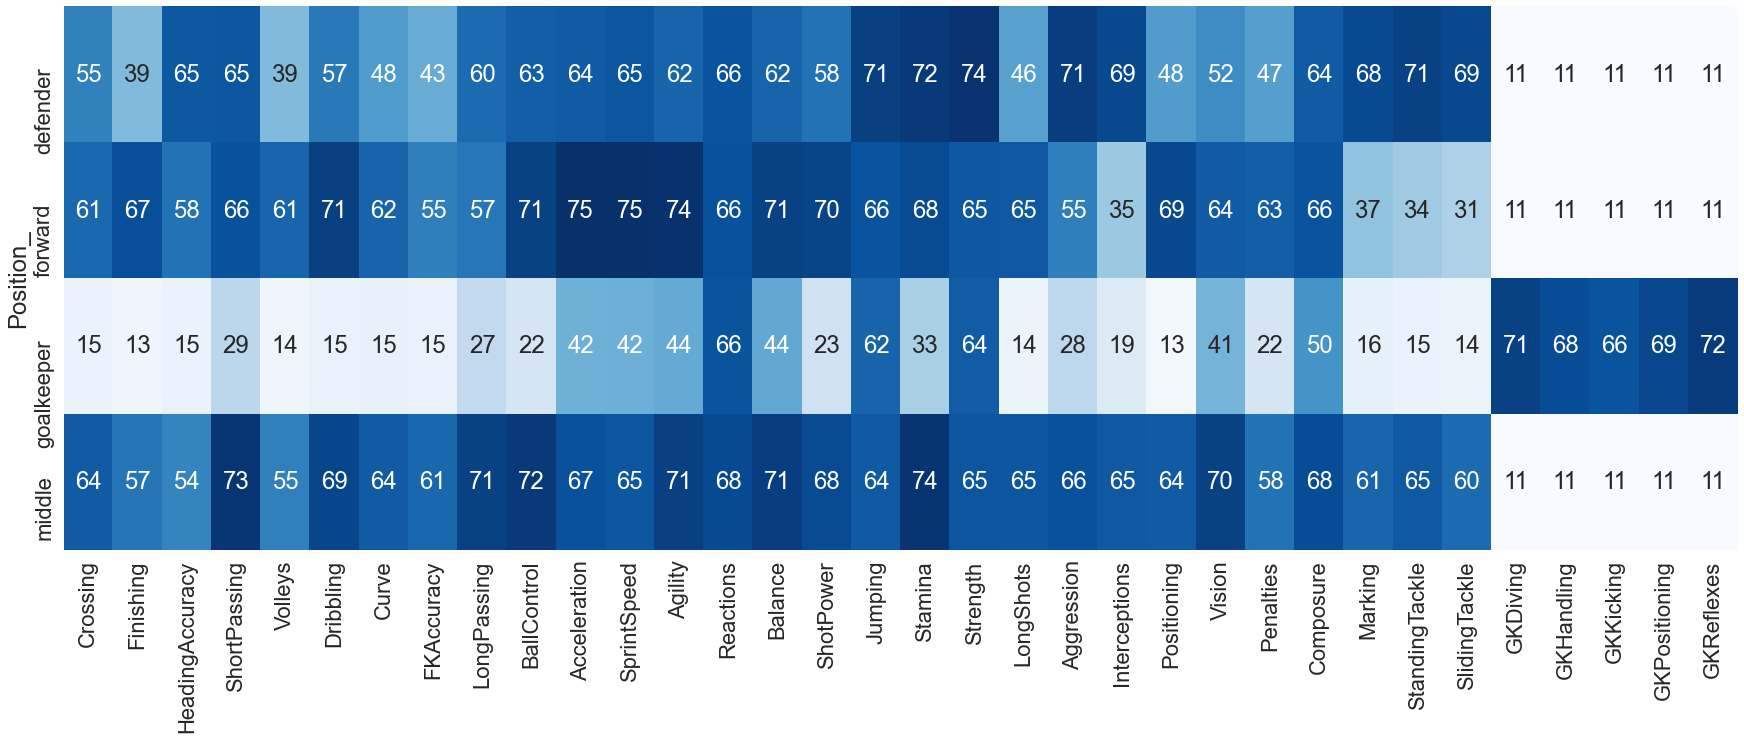

In [41]:
# Mean values of the attributes for each positions. (AVG PLAYERS)
show_attributes(avg_players)

In [42]:
#POOR PLAYERS

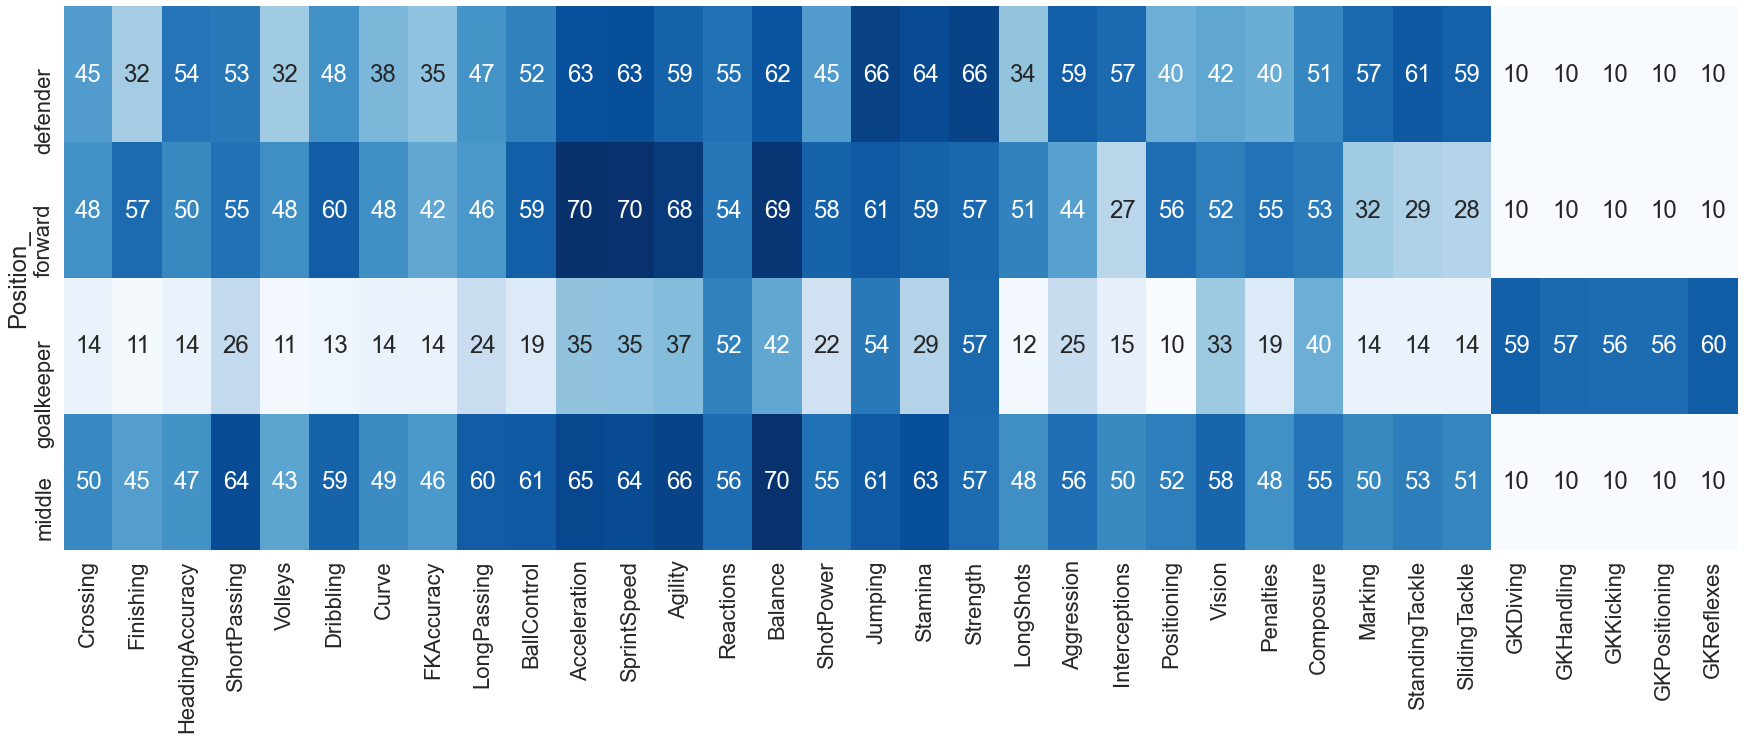

In [43]:
# Mean values of the attributes for each positions. (POOR PLAYERS)
show_attributes(poor_players)

In [44]:
#HEIGHTS & WEIGHTS

In [45]:
sns.set()

height_bins = [5.2, 5.4, 5.6, 5.8, 6, 6.2, 6.4, 6.6, 6.8]

weight_bins = [120, 140, 160, 180, 200, 220, 240]

def show_heights_weights(df):
    """
    This function receives a dataframe and then displays some distributions of the heights and weights for each position.
    
    Parameters:
    df (pd.DataFrame): Dataframe of the users.

    Returns:
    None
    """
    for position in df.Position_.unique(): 
        fig, axs = plt.subplots(ncols=2, figsize=(15,5))
        fig.text(0.06, 0.5, 'Number of ' + position + ' players', ha='center', va='center', rotation='vertical')

        _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.Position_==position]['Height'], bins=height_bins)
        axs[0].set_title('Height')

        _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.Position_==position]['Weight'], bins=weight_bins)
        axs[1].set_title('Weight')

        plt.show()

In [46]:
#BEST PLAYERS

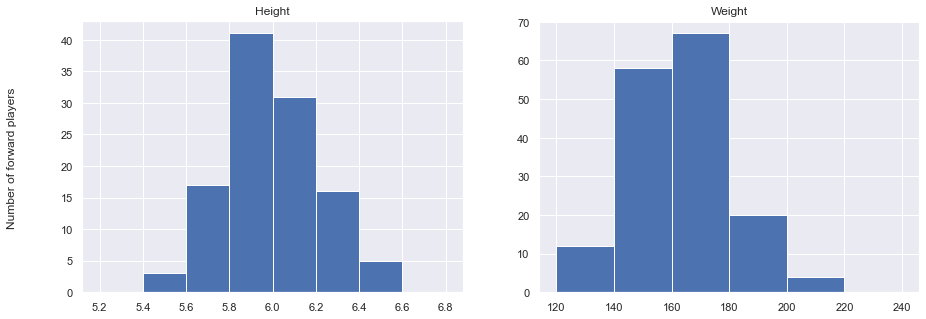

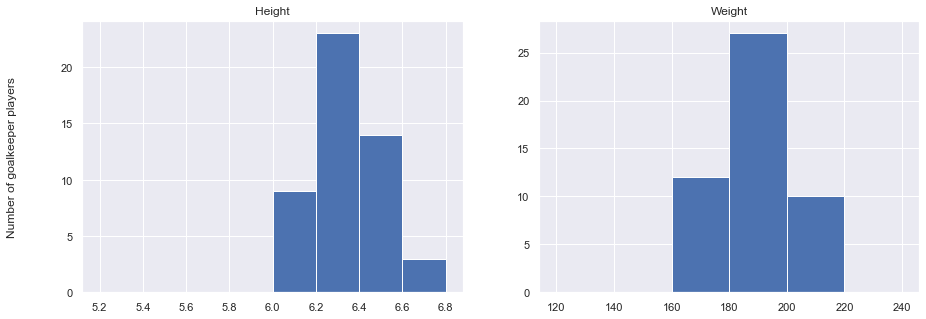

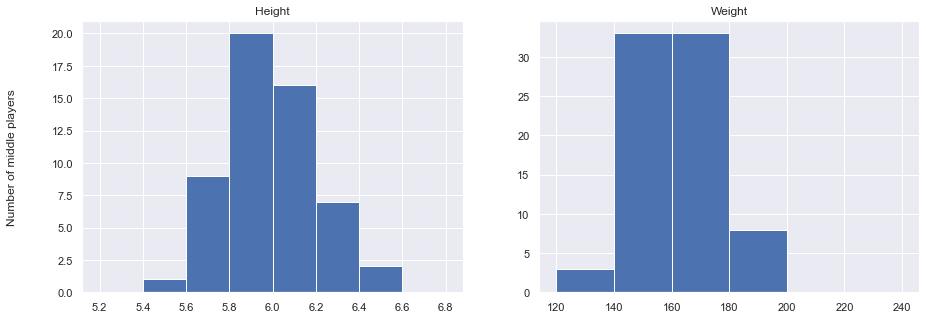

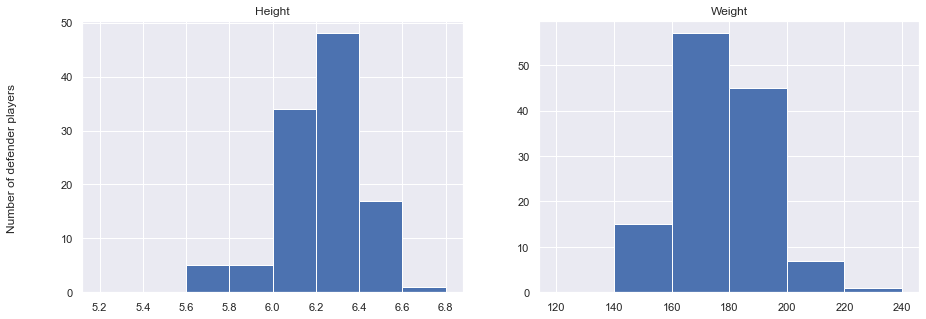

In [47]:
# Height and Weight distribution of the best players
show_heights_weights(best_players)

In [48]:
#AVERAGE PLAYERS

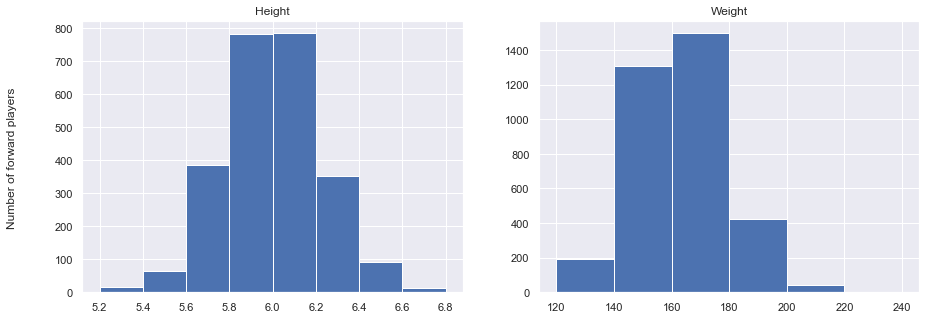

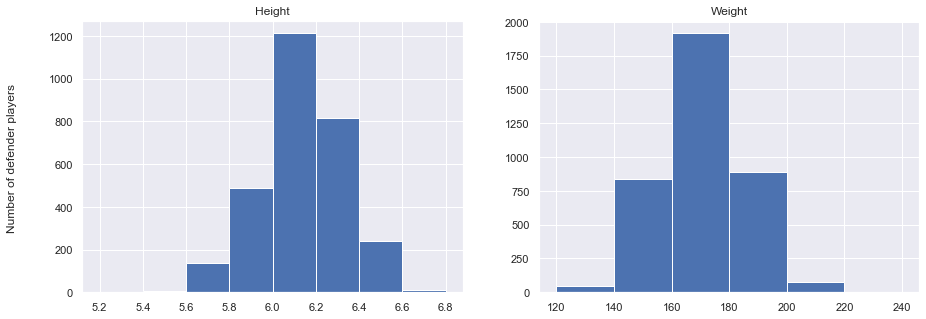

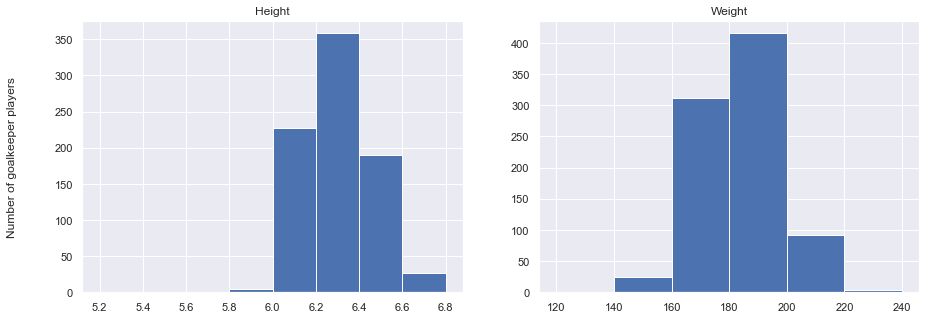

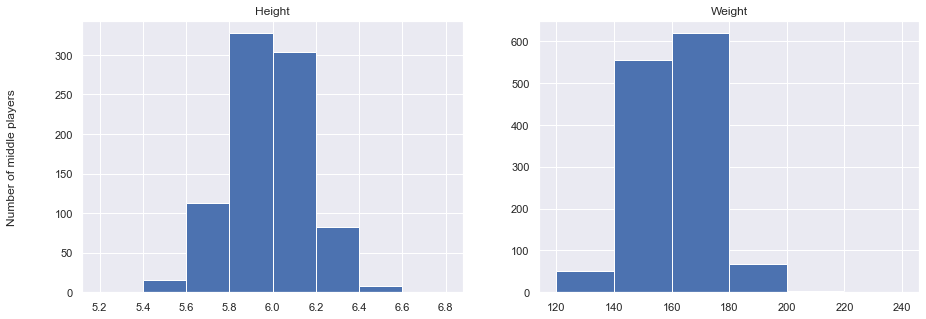

In [49]:
# Height and Weight distribution of the average players
show_heights_weights(avg_players)

In [50]:
#POOR PLAYERS

<ipython-input-45-b519b0813739>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.Position_==position]['Height'], bins=height_bins)
<ipython-input-45-b519b0813739>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.Position_==position]['Weight'], bins=weight_bins)


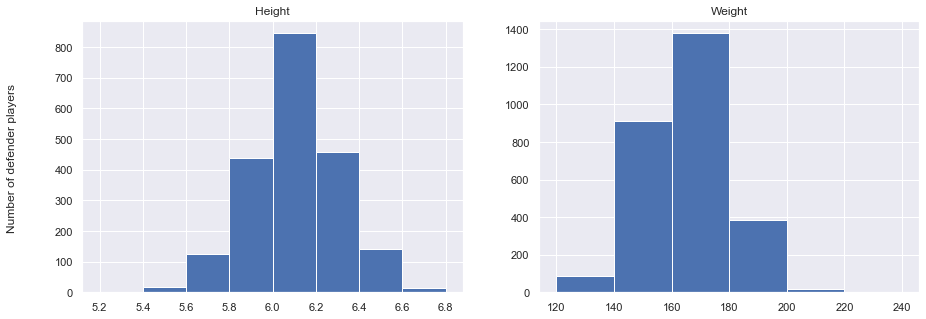

<ipython-input-45-b519b0813739>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.Position_==position]['Height'], bins=height_bins)
<ipython-input-45-b519b0813739>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.Position_==position]['Weight'], bins=weight_bins)


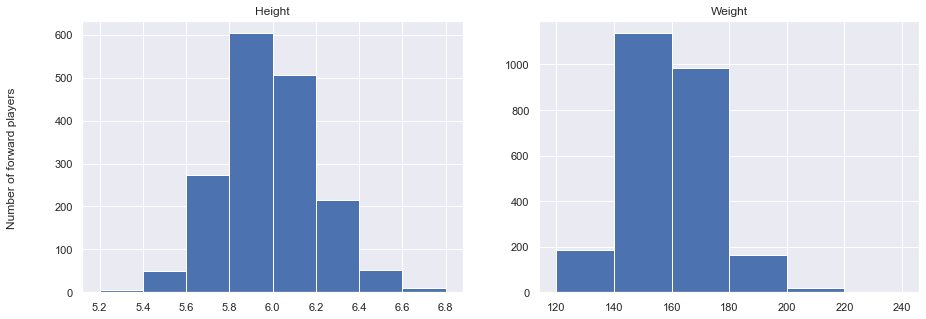

<ipython-input-45-b519b0813739>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.Position_==position]['Height'], bins=height_bins)
<ipython-input-45-b519b0813739>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.Position_==position]['Weight'], bins=weight_bins)


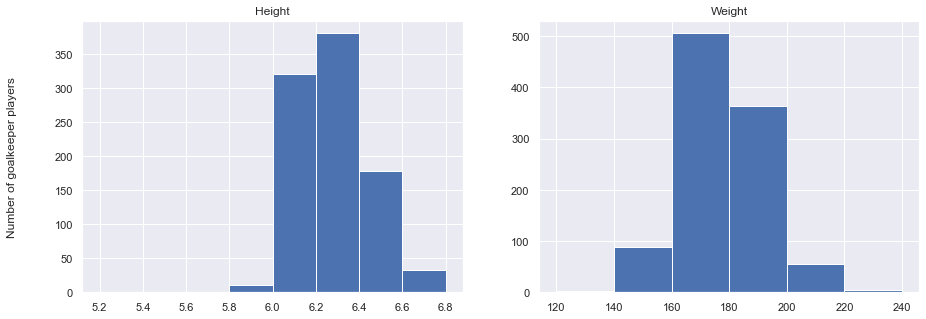

<ipython-input-45-b519b0813739>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[0].hist(df.dropna(subset=['Height'], axis=0)[df.Position_==position]['Height'], bins=height_bins)
<ipython-input-45-b519b0813739>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  _ = axs[1].hist(df.dropna(subset=['Weight'], axis=0)[df.Position_==position]['Weight'], bins=weight_bins)


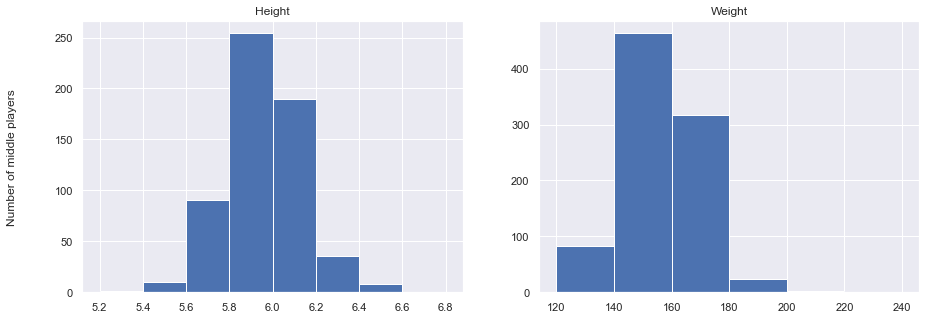

In [51]:
# Height and Weight distribution of the poor players
show_heights_weights(poor_players)

In [52]:
#WEAK FOOT

In [53]:
def show_week_foot(df):
    """
    This function receives a dataframe and then for each position displays a heatmap to describe the relation between
    Week foot and Overall.
    
    Parameters:
    df (pd.DataFrame): Dataframe of the users.

    Returns:
    None
    """
    for position, df_position in df.groupby('Position_'):
        try:
            x = df_position['Overall']
            y = df_position['Weak Foot']
            nbins=40
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df.shape[0], position))
            plt.ylabel('Weak Foot')
            plt.xlabel('Overall')
            plt.colorbar()
            plt.show()
        except:
            print("AVG Weak Foot for " + position + ": " + str(df_position['Weak Foot'].mean()))

<ipython-input-53-676f503da1a7>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


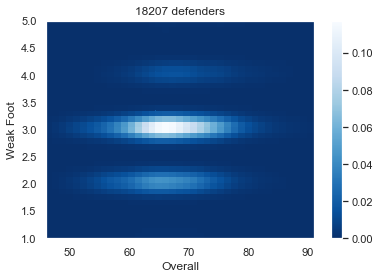

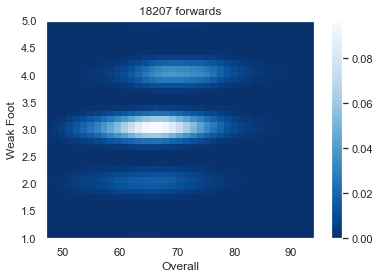

AVG Weak Foot for goalkeeper: 2.49386352479136


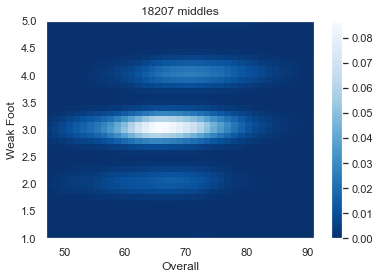

In [55]:
# Displaying the relation weak foot skill moves and overall for each position
show_week_foot(df)

<ipython-input-53-676f503da1a7>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


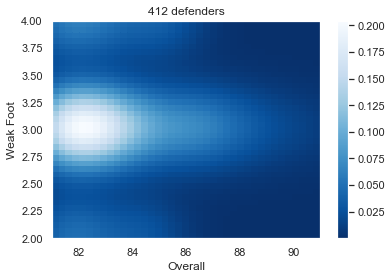

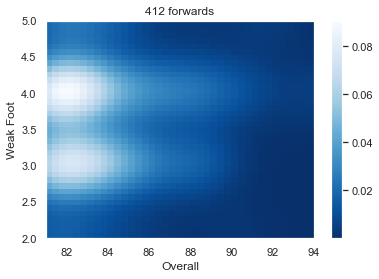

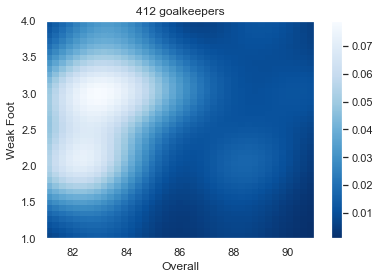

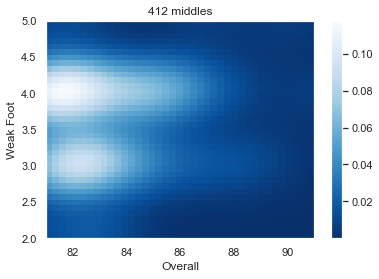

In [56]:
# Displaying the relation weak foot skill moves and overall of the best players for each position
show_week_foot(best_players)

<ipython-input-53-676f503da1a7>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


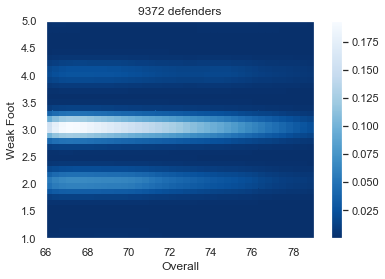

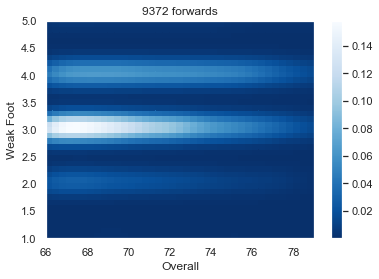

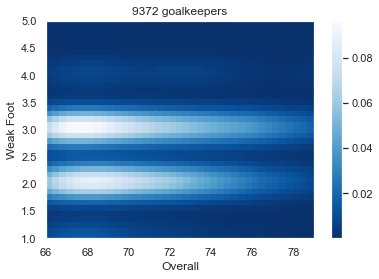

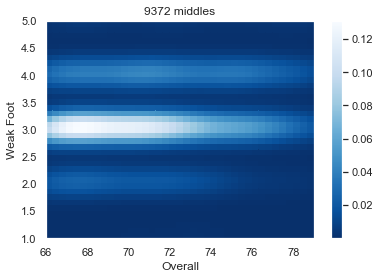

In [57]:
# Displaying the relation weak foot skill moves and overall of the average players for each position
show_week_foot(avg_players)

<ipython-input-53-676f503da1a7>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


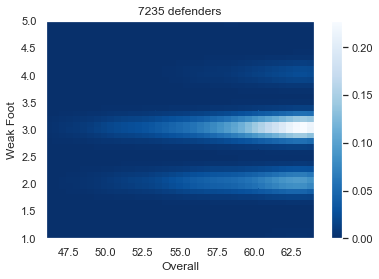

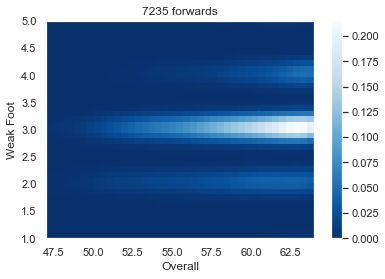

AVG Weak Foot for goalkeeper: 2.450980392156863


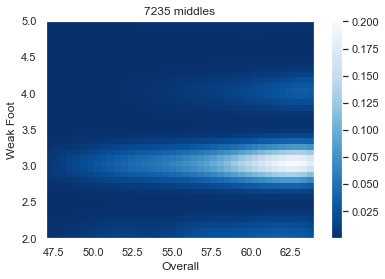

In [58]:
# Displaying the relation weak foot skill moves and overall of the poor players for each position
show_week_foot(poor_players)

In [59]:
#ALL PLAYERS

<ipython-input-60-9159da575a7f>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


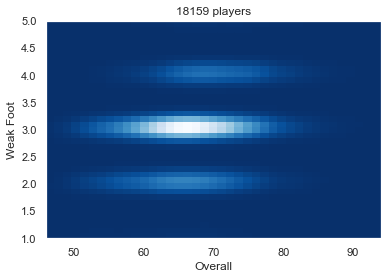

In [60]:
# Displaying the relation weak foot skill moves and overall
df_aux = df.dropna(subset=['Overall', 'Weak Foot'])
x = df_aux['Overall']
y = df_aux['Weak Foot']
nbins=40
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

plt.title('{} players'.format(df_aux.shape[0]))
plt.ylabel('Weak Foot')
plt.xlabel('Overall')
plt.show()

In [61]:
#SKILL MOVES

In [62]:
def print_skill_moves(df):
    """
    This function receives a dataframe and then for each position displays a heatmap to describe the relation between
    Skill moves and Overall.
    
    Parameters:
    df (pd.DataFrame): Dataframe of the users.

    Returns:
    None
    """
    df = df.dropna(subset=['Skill Moves', 'Overall'])
    for position, df_position in df.groupby('Position_'):
        try:
            x = df_position['Overall']
            y = df_position['Skill Moves']
            nbins=40
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df_position.shape[0], position))
            plt.ylabel('Skill Moves')
            plt.xlabel('Overall')
            plt.show()
        except:
            print("AVG Skill Moves for " + position + ": " + str(df_position['Skill Moves'].mean()))

<ipython-input-62-a3d61e2b8f38>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


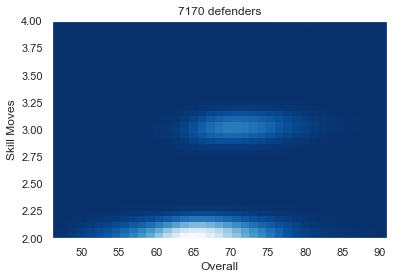

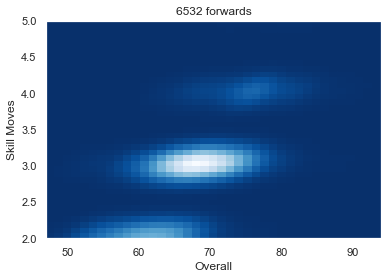

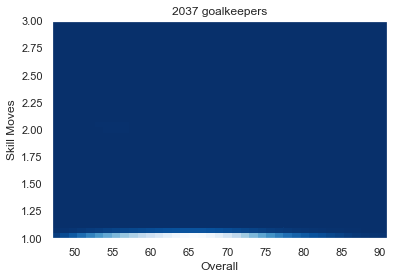

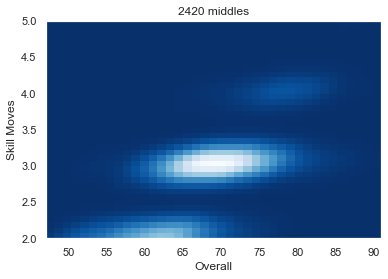

In [63]:
# Displaying the relation between skill moves and overall for each position
print_skill_moves(df)

<ipython-input-62-a3d61e2b8f38>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


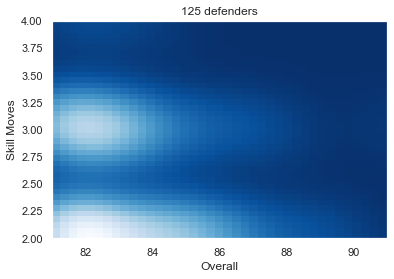

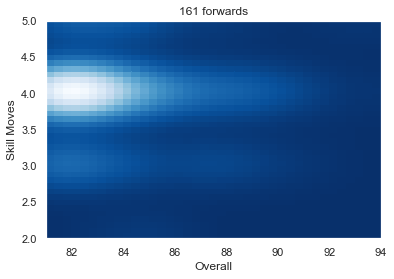

AVG Skill Moves for goalkeeper: 1.0


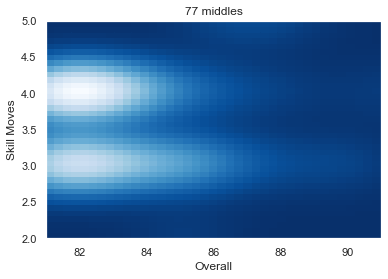

In [64]:
# Displaying the relation between skill moves and overall of the best players for each position
print_skill_moves(best_players)

<ipython-input-62-a3d61e2b8f38>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


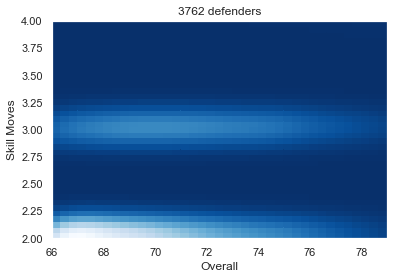

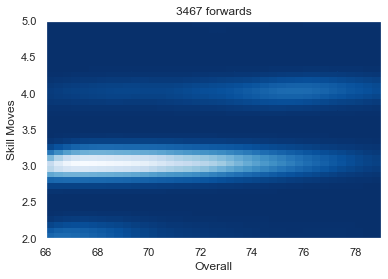

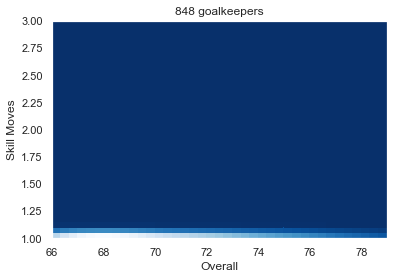

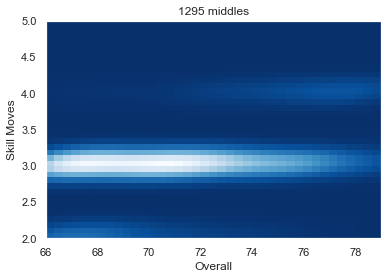

In [65]:
# Displaying the relation between skill moves and overall of the average players for each position
print_skill_moves(avg_players)

<ipython-input-62-a3d61e2b8f38>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


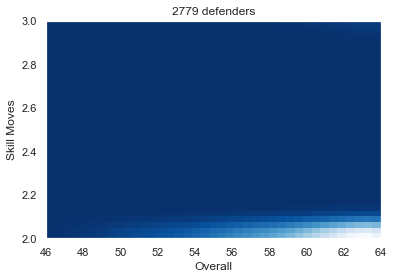

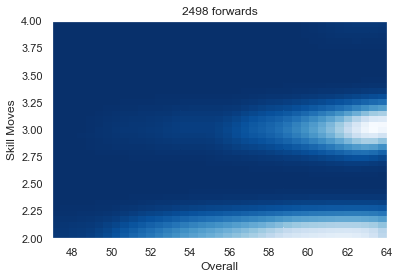

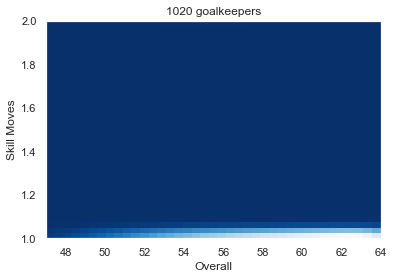

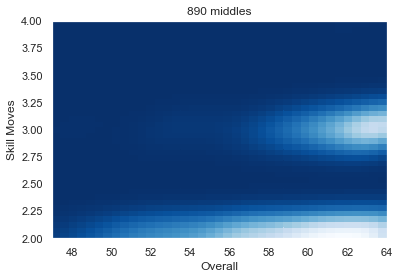

In [66]:
# Displaying the relation between skill moves and overall of the poor players for each position
print_skill_moves(poor_players)

In [67]:
#ALL PLAYERS

<ipython-input-68-f2b04a1890a3>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)


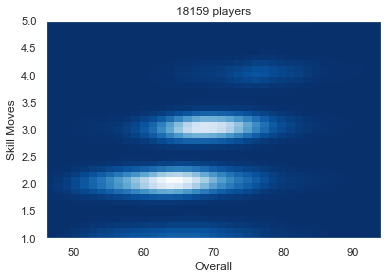

In [68]:
# Displaying the relation between skill moves and overall
df_aux = df.dropna(subset=['Overall', 'Skill Moves'])
x = df_aux['Overall']
y = df_aux['Skill Moves']
nbins=40
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap=plt.cm.Blues_r)

plt.title('{} players'.format(df_aux.shape[0]))
plt.ylabel('Skill Moves')
plt.xlabel('Overall')
plt.show()


In [69]:
#AGE

In [70]:
def show_age(df):
    """
    This function receives a dataframe and then displays a heatmap to describe the relation between
    Age and Overall.
    
    Parameters:
    df (pd.DataFrame): Dataframe of the users.

    Returns:
    None
    """
    df = df.dropna(subset=['Age', 'Overall'])
    for position, df_position in df.groupby('Position_'):
        try:
            x = df_position['Age']
            y = df_position['Overall']
            nbins=30
            k = kde.gaussian_kde([x,y])
            xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
            zi = k(np.vstack([xi.flatten(), yi.flatten()]))

            plt.xlim(x.min(), x.max())  
            plt.ylim(y.min(), y.max())  

            plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)

            plt.title('{} {}s'.format(df_position.shape[0], position))
            plt.xlabel('Age')
            plt.ylabel('Overall')

            plt.show()
        except:
            print("AVG Age for " + position + ": " + str(df_position['Skill Moves'].mean()))


<ipython-input-70-c29f73f2c9fe>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)


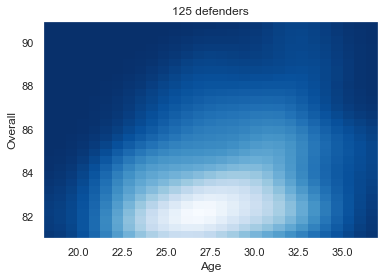

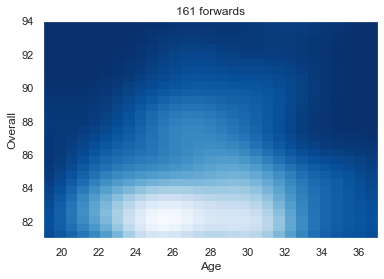

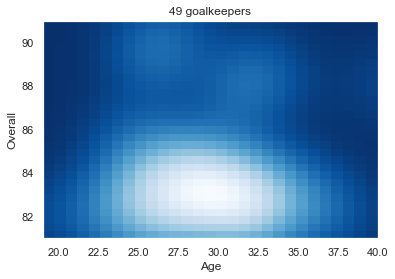

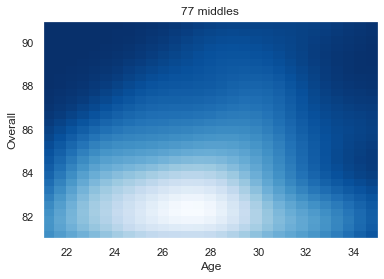

In [71]:
# Displaying the relation between age and overall of the best players
show_age(best_players)

<ipython-input-70-c29f73f2c9fe>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)


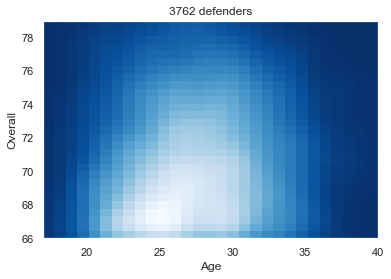

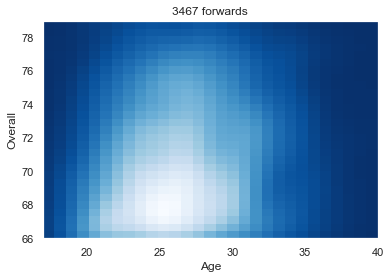

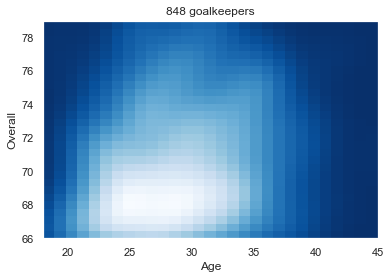

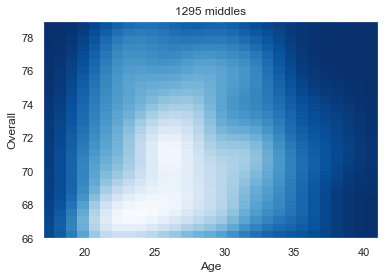

In [72]:
# Displaying the relation between age and overall of the average players
show_age(avg_players)

<ipython-input-70-c29f73f2c9fe>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)


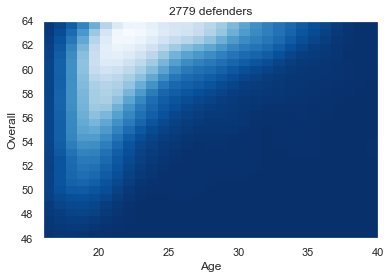

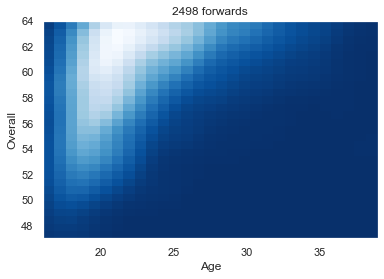

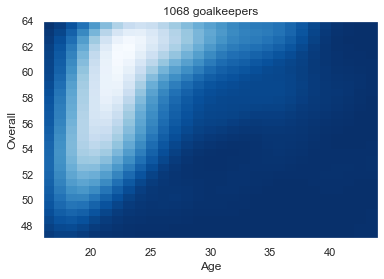

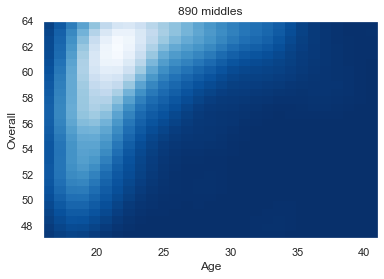

In [73]:
# Displaying the relation between age and overall of the poor players
show_age(poor_players)

In [74]:
#ALL PLAYERS

<ipython-input-70-c29f73f2c9fe>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)


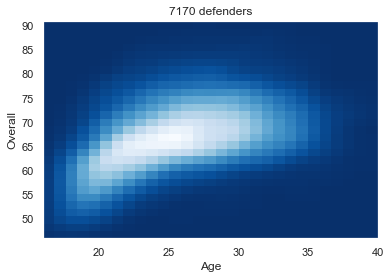

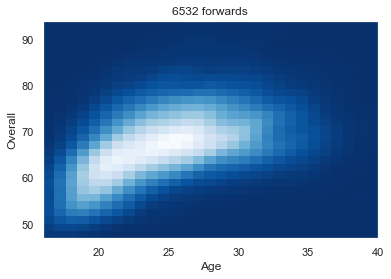

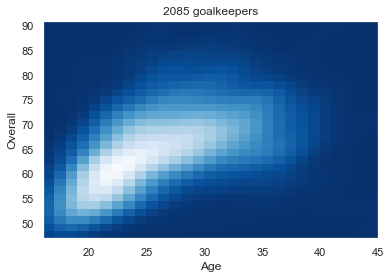

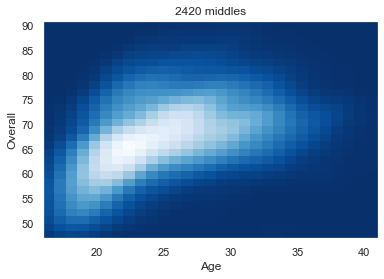

In [75]:
# Displaying the relation between age and overall of all players
show_age(df)

In [76]:
#ALL PLAYERS

<ipython-input-77-a7c61acc13b4>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)


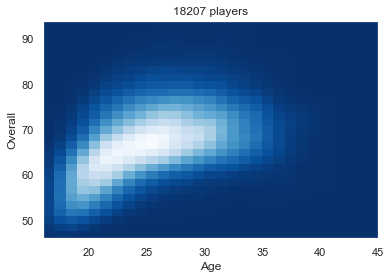

In [77]:
# Displaying the relation between age and overall of all players and all position

x = df['Age']
y = df['Overall']
nbins=30
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

plt.xlim(x.min(), x.max())  
plt.ylim(y.min(), y.max())  

plt.pcolormesh(xi, yi, zi.reshape(xi.shape),  cmap=plt.cm.Blues_r)

plt.title('{} players'.format(df.shape[0]))
plt.xlabel('Age')
plt.ylabel('Overall')

plt.show()